In [93]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/campus/campus.csv


# LOADING DATASET AND ITS CLEANING

In [94]:
df=pd.read_csv('/kaggle/input/campus/campus.csv')
df

,Timestamp,What is your current year of study,What is your current relationship status?,How do you prefer studying before exams?,Do you do competitive programming?,Which hostel do you live in?,What is your gender?,What is your favourite sport?,Favourite hangout place in campus,Which state/union territory do you belong to?,What is your dept?,What is your preferred coding language?,What is your favourite place to eat at IIT Guwahati?,Which is your favourite club in IIT Guwahati?,Are you satisfied in IIT Guwahati,What is your current cpi?
0,2022/08/15 2:57:34 pm GMT+5:30,2nd,In a relationship,Pulling of all nighters :),Yes,NaN,Man,Table tennis,IIT G lake (in front of library),Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,2022/08/15 2:57:46 pm GMT+5:30,3rd,Single,Studying on a regular basis,No,Manas,Man,Football,IIT G lake (in front of library),Uttar Pradesh,CST,Python,Hostel Canteen,ml.ai,No,1
2,2022/08/15 2:58:25 pm GMT+5:30,2nd,Single,Studying on a regular basis,No,Disang,Woman,Badminton,IIT G lake (in front of library),West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.3
3,2022/08/15 2:59:33 pm GMT+5:30,2nd,Single,Pulling of all nighters :),No,NaN,Man,Football,IIT G lake (in front of library),The Government of NCT of Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.5
4,2022/08/15 3:01:10 pm GMT+5:30,NaN,Single,Studying on a regular basis,No,Lohit,Man,Cricket,IIT G lake (in front of library),Uttar Pradesh,NaN,Java,Hostel Canteen,ml.ai,Yes,8.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2022/08/20 7:12:00 am GMT+5:30,4th,Single,Studying on a regular basis,No,Manas,Man,Drone racing,New Sac,Maharashtra,ME,Python,Others,Aeromodelling,Yes,8.66
223,2022/08/20 7:46:37 am GMT+5:30,4th,Single,Studying on a regular basis,Yes,Lohit,Man,Table tennis,New Sac,Maharashtra,MnC,Others,Food Court,Aeromodelling,Maybe,9.34
224,2022/08/20 9:30:23 am GMT+5:30,2nd,Single,Studying on a regular basis,Yes,Subansiri,Woman,Tennis,Food Court,Maharashtra,CST,C++,Rolls Mania/Tacos,Coding Club,Yes,6.87
225,2022/08/20 10:44:36 am GMT+5:30,2nd,In a relationship,Studying on a regular basis,No,Disang,Woman,Badminton,Hostel Canteen,Kerala,ECE,C++,Hostel Canteen,E cell,Maybe,8.4


**FINDING NULL VALUES IN EACH COLUMN**

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Timestamp                                             227 non-null    object
 1   What is your current year of study                    223 non-null    object
 2   What is your current relationship status?             225 non-null    object
 3   How do you prefer studying before exams?              227 non-null    object
 4   Do you do competitive programming?                    227 non-null    object
 5   Which hostel do you live in?                          220 non-null    object
 6   What is your gender?                                  224 non-null    object
 7   What is your favourite sport?                         194 non-null    object
 8   Favourite hangout place in campus                     217 non-null    

**FINDING THAT WHICH YEAR AND WHAT SECTIONS ARE DOMINATING IN THIS DATASET**

In [98]:
df.describe()

,Timestamp,What is your current year of study,What is your current relationship status?,How do you prefer studying before exams?,Do you do competitive programming?,Which hostel do you live in?,What is your gender?,What is your favourite sport?,Favourite hangout place in campus,Which state/union territory do you belong to?,What is your dept?,What is your preferred coding language?,What is your favourite place to eat at IIT Guwahati?,Which is your favourite club in IIT Guwahati?,Are you satisfied in IIT Guwahati,What is your current cpi?
count,227,223,225,227,227,220,224,194,217,218,216,218,211,213,225,226
unique,227,4,3,2,2,14,4,64,11,28,12,5,8,25,3,137
top,2022/08/15 2:57:34 pm GMT+5:30,2nd,Single,Pulling of all nighters :),Yes,Disang,Man,Cricket,IIT G lake (in front of library),Maharashtra,CSE,C++,Food Court,Coding Club,Yes,7
freq,1,162,157,123,130,44,180,27,46,30,58,141,56,85,126,9


**DROPPING OFF THE TIMESTAMP COLUMN AS IT IS TOTALLY USELESS**

In [99]:
df.drop('Timestamp', axis='columns', inplace=True) # Got rid of time stamp
print(df.shape)

(227, 15)


**RENAMING THE COLUMNS SO IT BEACOMES EASY FOR US TO PREFORM EDA ON THE DATASET.**

In [100]:
df.rename(columns = {'What is your current year of study':'year', 
                     'What is your current relationship status?': 'rel',
                     'How do you prefer studying before exams?': 'stud',
                     'Do you do competitive programming?': 'cp',
                     'Which hostel do you live in?': 'dorm',
                     'What is your gender?': 'sex',
                     'What is your favourite sport?': 'sport',
                     'Favourite hangout place in campus': 'fav_spot',
                     'Which state/union territory do you belong to?': 'state',
                     'What is your dept?': 'dep',
                     'What is your preferred coding language?': 'coding_lang',
                     'What is your favourite place to eat at IIT Guwahati?': 'fav_place_to_eat',
                     'Which is your favourite club in IIT Guwahati?': 'fav_club',
                     'Are you satisfied in IIT Guwahati': 'satisfied',
                     'What is your current cpi?': 'cpi'}, inplace = True)

df.head()

,year,rel,stud,cp,dorm,sex,sport,fav_spot,state,dep,coding_lang,fav_place_to_eat,fav_club,satisfied,cpi
0,2nd,In a relationship,Pulling of all nighters :),Yes,NaN,Man,Table tennis,IIT G lake (in front of library),Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,3rd,Single,Studying on a regular basis,No,Manas,Man,Football,IIT G lake (in front of library),Uttar Pradesh,CST,Python,Hostel Canteen,ml.ai,No,1
2,2nd,Single,Studying on a regular basis,No,Disang,Woman,Badminton,IIT G lake (in front of library),West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.3
3,2nd,Single,Pulling of all nighters :),No,NaN,Man,Football,IIT G lake (in front of library),The Government of NCT of Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.5
4,NaN,Single,Studying on a regular basis,No,Lohit,Man,Cricket,IIT G lake (in front of library),Uttar Pradesh,NaN,Java,Hostel Canteen,ml.ai,Yes,8.83


**CHANGING THE VALUES IN RELATIONSHIP COLUMN TO A SIMPLE ONE-WORD STATEMENT**

In [101]:
print('Unique values in relationship column:')
print(df['rel'].unique())
print()

df['rel'].replace('In a relationship', 'relationship', inplace=True)
df['rel'].replace("It's complicated", 'complicated', inplace=True)


print('Unique values in relationship column after replacements:')
print(df['rel'].unique())

Unique values in relationship column:
['In a relationship' 'Single' "It's complicated" nan]

Unique values in relationship column after replacements:
['relationship' 'Single' 'complicated' nan]


/tmp/ipykernel_33/4037695723.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rel'].replace('In a relationship', 'relationship', inplace=True)
/tmp/ipykernel_33/4037695723.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

**CHANGING THE VALUES IN STUDY COLUMN TO A SIMPLE ONE-WORD STATEMENT.**

In [104]:
print('Unique values in study column:')
print(df['stud'].unique())
print()

df['stud'].replace('Pulling of all nighters :)', 'all_nighters', inplace=True)
df['stud'].replace('Studying on a regular basis', 'regular_study', inplace=True)

print('Unique values in study column after replacements:')
print(df['stud'].unique())

Unique values in study column:
['all_nighters' 'regular_study']

Unique values in study column after replacements:
['all_nighters' 'regular_study']


/tmp/ipykernel_33/1416170880.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stud'].replace('Pulling of all nighters :)', 'all_nighters', inplace=True)
/tmp/ipykernel_33/1416170880.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

**CHANGING THE VALUES IN FAVORITE SPOTS COLUMN TO A SIMPLE ONE-WORD STATEMENT**

In [106]:
print('Unique values in hangout spot column:')
print(df['fav_spot'].unique())
print()

df['fav_spot'].replace('IIT G lake (in front of library)', 'IITG_Lake', inplace=True)
df['fav_spot'].replace('Serpentine Lake 😏', 'serpentine', inplace=True)
df['fav_spot'].replace('Lake in front of the hospital', 'Tihor_lake', inplace=True)
df['fav_spot'] = df['fav_spot'].str.replace(' ', '_')

print('Unique values in hangout spot column after replacements:')
print(df['fav_spot'].unique())

Unique values in hangout spot column:
['IITG_Lake' 'Food_Court' 'Hostel_Canteen' 'Khoka' 'serpentine' nan
 'New_Sac' 'Old_Sac' 'Playgrounds' 'Tihor_lake' 'Market_Complex' 'Others']

Unique values in hangout spot column after replacements:
['IITG_Lake' 'Food_Court' 'Hostel_Canteen' 'Khoka' 'serpentine' nan
 'New_Sac' 'Old_Sac' 'Playgrounds' 'Tihor_lake' 'Market_Complex' 'Others']


/tmp/ipykernel_33/3165315137.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fav_spot'].replace('IIT G lake (in front of library)', 'IITG_Lake', inplace=True)
/tmp/ipykernel_33/3165315137.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

**REPLACING SOME OF THE UNWANTED LONG STRINGS TO THEIR SHORTER VERSION.**

In [111]:
df['state'].replace('The Government of NCT of Delhi', 'Delhi', inplace=True)
df['fav_place_to_eat'].replace('None', np.nan, inplace=True)
df['fav_club'].replace('ml.ai', 'iitg.ai', inplace=True)
df['dorm'].replace('Bhramaputra', 'Brahmaputra', inplace=True)

/tmp/ipykernel_33/379894767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['state'].replace('The Government of NCT of Delhi', 'Delhi', inplace=True)
/tmp/ipykernel_33/379894767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

***THE CPI COLUMN CONTAINED A STRING 1ST YEAR SO CPI IS "0" LIKE STATEMENT SO CONVERTED FROM STRING TO NUMERIC. THE NULL VALUES IN CPI COLUMN WHICH WILL FURTHER BE REPLACED WITH MEDIAN***

In [112]:

def isfloat(x):
    try:
        float(x)
        return True
    except:
        return False
    
for i in df.index:
    if isfloat(df.loc[i, 'cpi']):
        df.loc[i, 'cpi'] = float(df.loc[i, 'cpi'])
    else:
        df.loc[i, 'cpi'] = np.nan
        
    if (df.loc[i, 'cpi'] >= 10) | (df.loc[i, 'cpi'] <= 4):
        df.loc[i, 'cpi'] = np.nan
        
df['cpi'] = df['cpi'].astype('float64')
df['cpi'].isna().sum()

21

***STEPS THAT ARE GOING TO BE FOLLOWED FOR FILLING NULL VALUES -->***
1.THE CPI COLUMN NULL VALUES ARE FILLED WITH MEDIAN.



2.IF THE DORM,DEP COLUMN CONTAINS NaN THEN I WILL FILL IT WITH 'UNKNOWN'


3.SATISFIED COLUMN IS FILLED WITH MODE OF THE COLUMN.


4.IF THE FAV_CLUB IS NaN THEN FILL IT WITH 'NONE'.


5.CONVERTING YEAR FROM ALPHANUMERIC TO NUMERIC.

In [115]:
df['cpi'] = df['cpi'].fillna(df['cpi'].median())
df['fav_club'] = df['fav_club'].fillna('None')
df['dorm'].fillna('Unknown', inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)
df['dep'].fillna('Unknown', inplace=True)
df['satisfied'].fillna(df['satisfied'].mode()[0], inplace=True)
year_mapping = {'1st': 1, '2nd': 2, '3rd': 3, '4th': 4}
df['year'] = df['year'].map(year_mapping)

/tmp/ipykernel_33/243069754.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dorm'].fillna('Unknown', inplace=True)
/tmp/ipykernel_33/243069754.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

***CHECKING THE CHANGES IN THE DATAFRAME.***

In [78]:
df

,year,rel,stud,cp,dorm,sex,sport,fav_spot,state,dep,coding_lang,fav_place_to_eat,fav_club,satisfied,cpi
0,2,relationship,all_nighters,Yes,Unknown,Man,Table tennis,IITG_Lake,Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.860
1,3,Single,regular_study,No,Manas,Man,Football,IITG_Lake,Uttar Pradesh,CST,Python,Hostel Canteen,iitg.ai,No,8.235
2,2,Single,regular_study,No,Disang,Woman,Badminton,IITG_Lake,West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.300
3,2,Single,all_nighters,No,Unknown,Man,Football,IITG_Lake,Delhi,Unknown,Python,Food Court,Coding Club,Maybe,7.500
4,2,Single,regular_study,No,Lohit,Man,Cricket,IITG_Lake,Uttar Pradesh,Unknown,Java,Hostel Canteen,iitg.ai,Yes,8.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,4,Single,regular_study,No,Manas,Man,Drone racing,New_Sac,Maharashtra,ME,Python,Others,Aeromodelling,Yes,8.660
223,4,Single,regular_study,Yes,Lohit,Man,Table tennis,New_Sac,Maharashtra,MnC,Others,Food Court,Aeromodelling,Maybe,9.340
224,2,Single,regular_study,Yes,Subansiri,Woman,Tennis,Food_Court,Maharashtra,CST,C++,Rolls Mania/Tacos,Coding Club,Yes,6.870
225,2,relationship,regular_study,No,Disang,Woman,Badminton,Hostel_Canteen,Kerala,ECE,C++,Hostel Canteen,E cell,Maybe,8.400


In [116]:
df.nunique()

year                  4
rel                   3
stud                  2
cp                    2
dorm                 14
sex                   4
sport                64
fav_spot             11
state                28
dep                  13
coding_lang           5
fav_place_to_eat      8
fav_club             25
satisfied             3
cpi                 119
dtype: int64

**CHECKING THE DEPARTMENTS PRESENT**

In [117]:
print(df['dep'].unique())

['CSE' 'CST' 'ECE' 'Unknown' 'EP' 'ME' 'CE' 'MnC' 'CL' 'EEE' 'BSBE' 'HSS'
 'Dsai']


# PLOTTING THE GRAPH BETWEEN YEAR AND CPI DEPARTMENT-VISE TO KNOW THE TREND OF CPI IN EACH DEPARTMENT ACCORDING TO THIS DATASET

1.CPI IN CHEMICAL ENGG. I.E. "CL" & "CST" BRANCH INCREASES FORM 2ND TO 3RD YEAR.


2.ALSO CPI FOR "BSBE" INCREASES FORM 2ND TO 3D BUT DECREASES FRM 3RD TO 4TH.


3.CPI FOR "EEE" DECREASES FROM 2ND TO 3RD YEAR BUT INCREASES FURTHER.


4.CPI FOR "ECE" INCREASES FROM 2ND TO 3RD YEAR BUT DECREASES FURTHER.


5.CPI FOR "ME" DECREASES FORM 1ST TO 2ND 


6.CPI FOR "EP" DECREASES FROM 2ND TO 3RD.


6.CPI FOR "CSE" AND "MNC" FOLLOW A COMMON ZIGZAG TREND.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

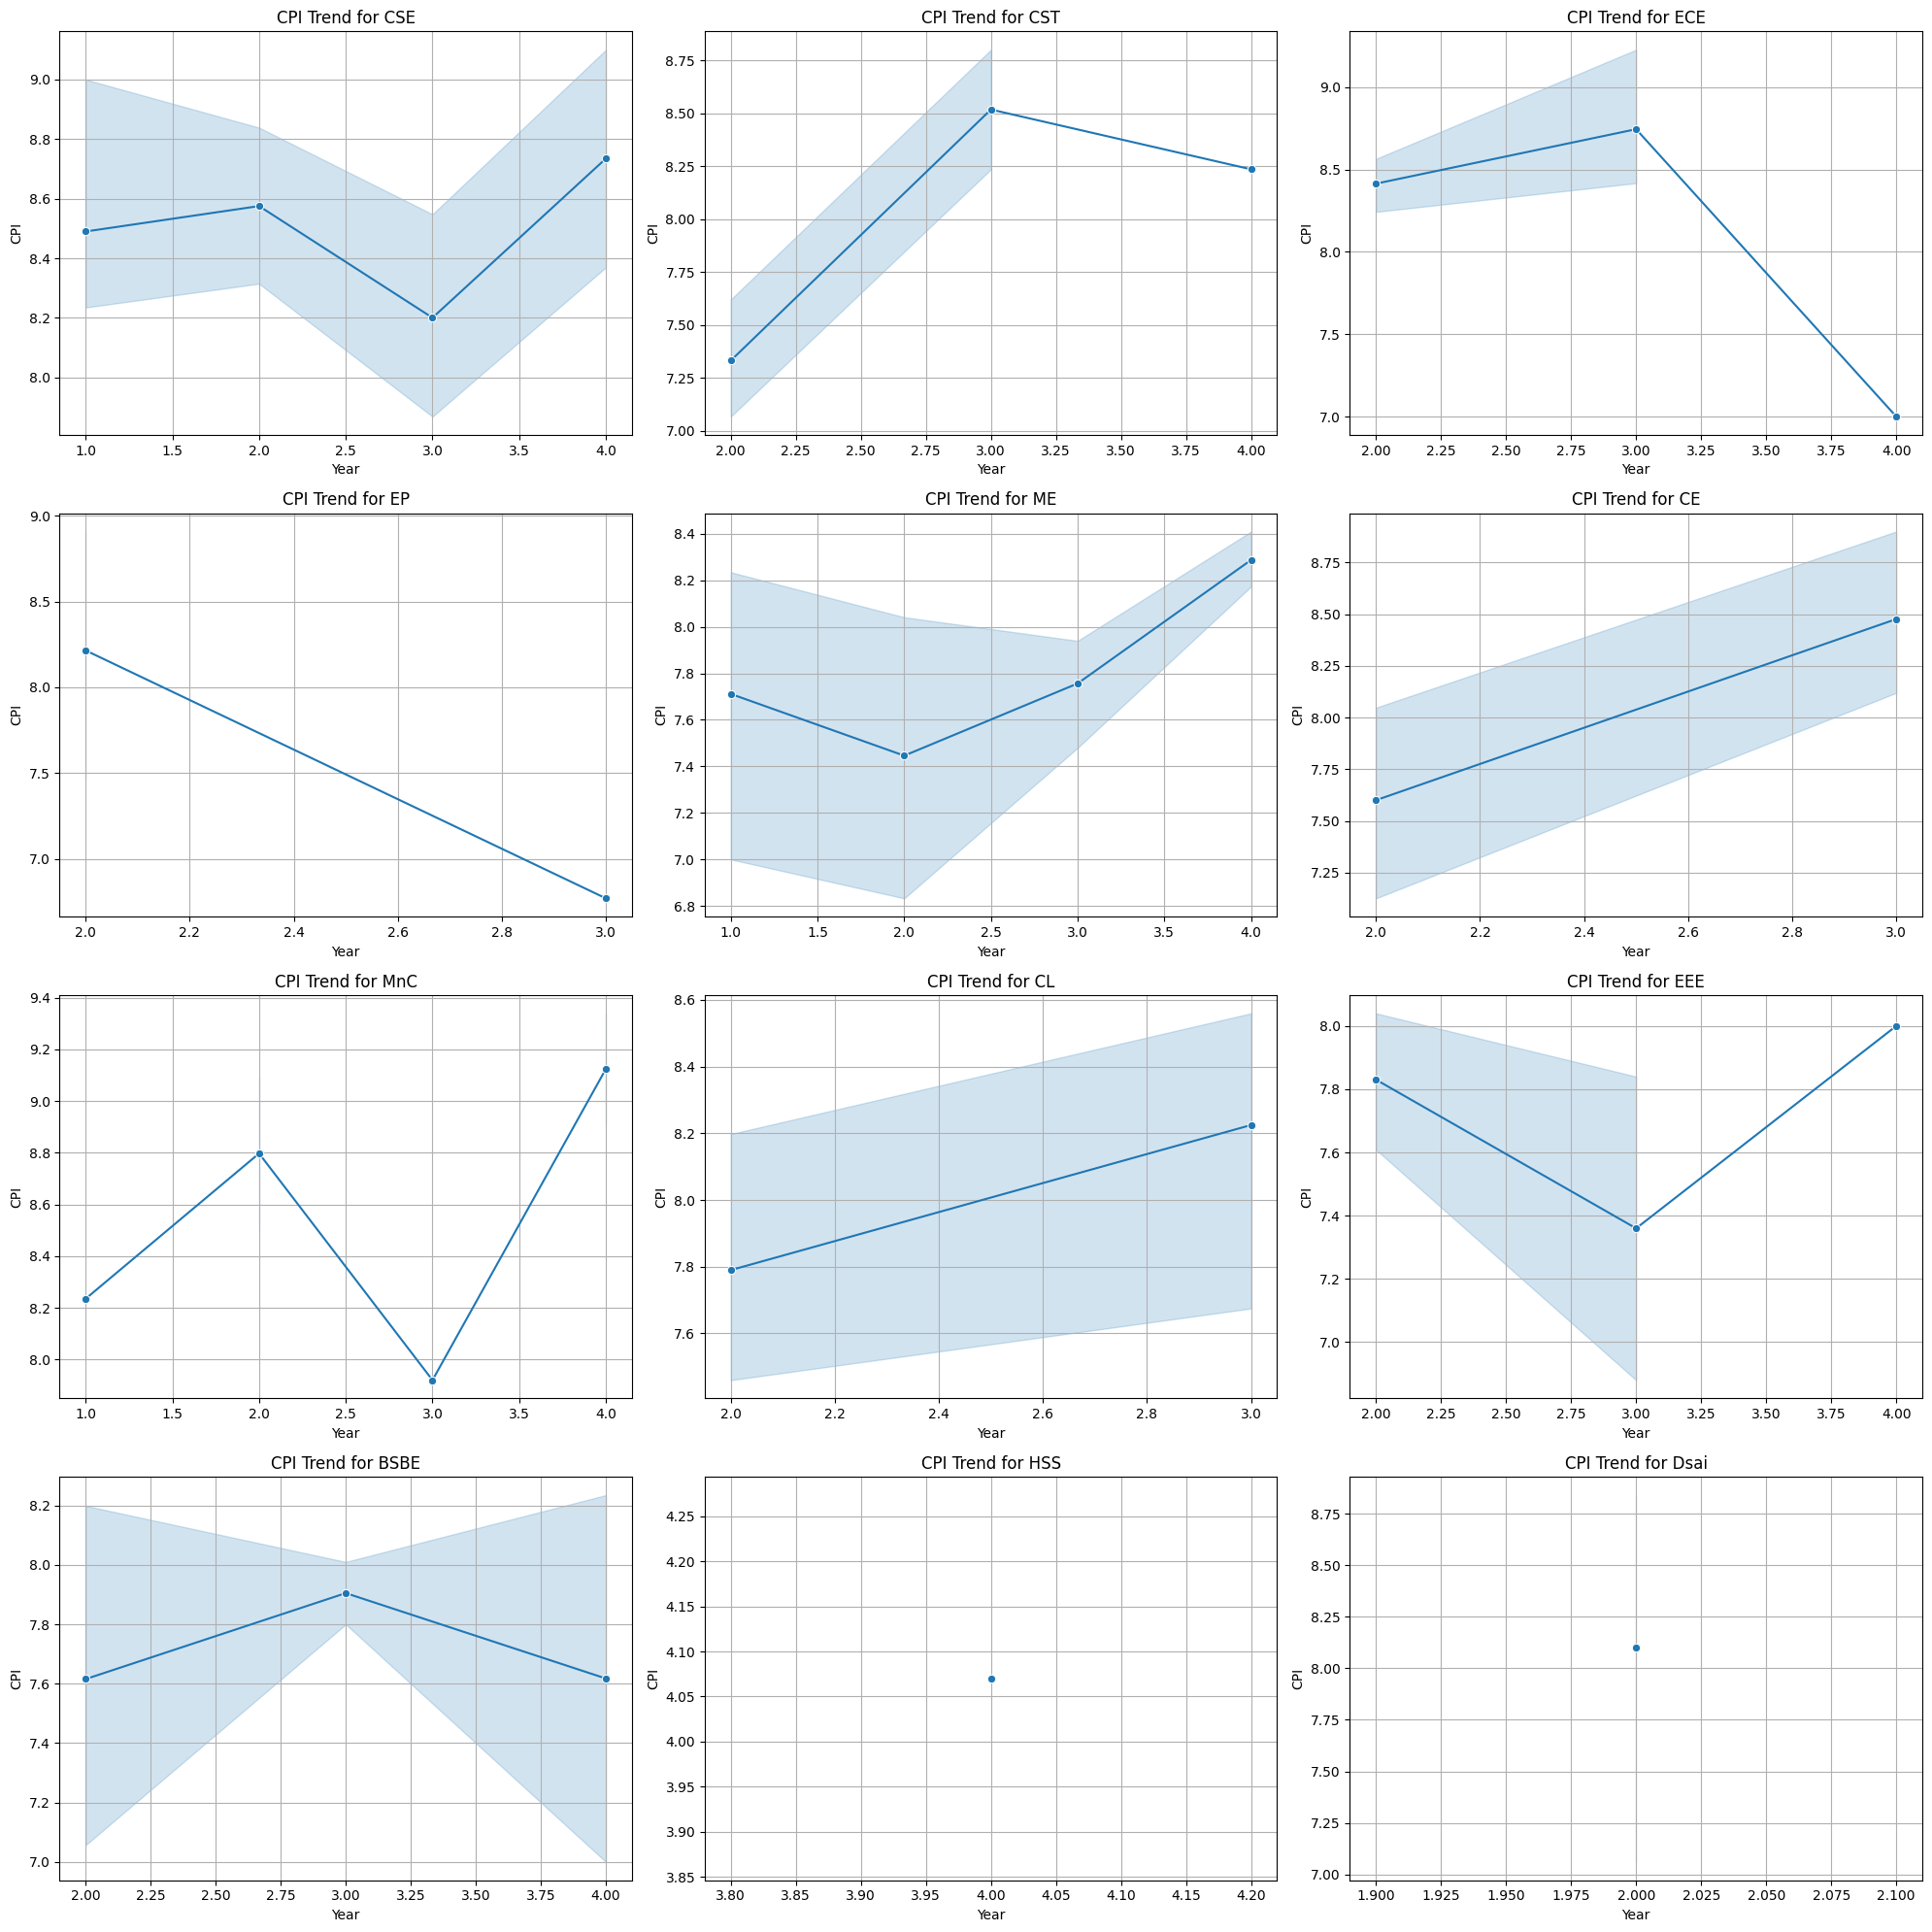

In [118]:

df = df[df['dep'] != 'Unknown']

departments = df['dep'].unique()

num_deps = len(departments)
cols = 3
rows = math.ceil(num_deps / cols)

fig, axs = plt.subplots(rows, cols, figsize=(20, 20), constrained_layout=True)
axs = axs.flatten()

for i, dep in enumerate(departments):
    sns.lineplot(ax=axs[i], x='year', y='cpi', data=df[df['dep'] == dep], marker='o')
    axs[i].set_title(f'CPI Trend for {dep}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('CPI')
    axs[i].grid(True)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


# PLOTTING THE COUNT OF STUDENTS TO KNOW THE CP GUYS IN EVERY HOSTEL.

1."DISANG" HAS THE HIGHEST NUMBER OF CP GUYS WHEREAS "SUBANSIRI" HAS THE LOWEST.

2."BRAHMA" AND "LOHIT" ARE AT 2nd AND 3rd POSITION

/tmp/ipykernel_33/1242827180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cp'].fillna('No', inplace=True)
/tmp/ipykernel_33/1242827180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cp'].fillna('No', inplace=True)


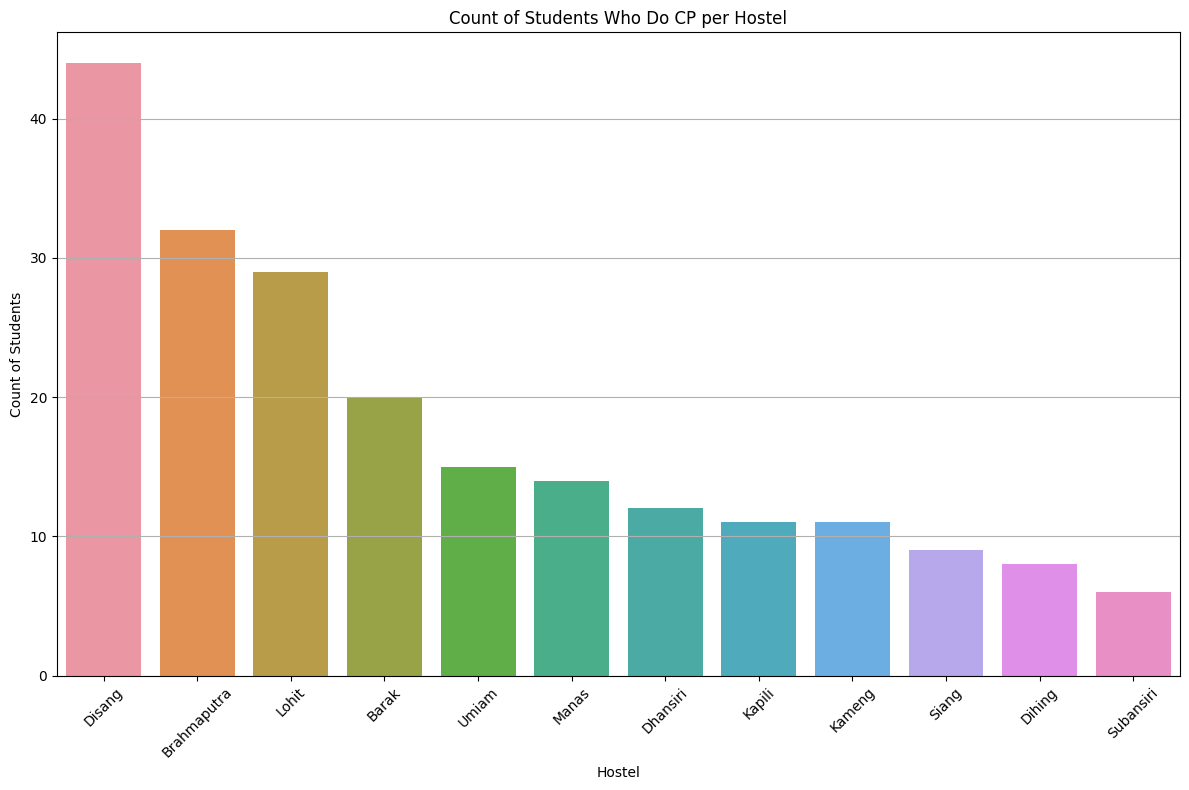

In [119]:
hostels=df['dorm'].unique()
df['cp'].fillna('No', inplace=True)
cp_df = df[df['cp'] == 'Yes']
cp_df=df[df['dorm']!='Unknown']
plt.figure(figsize=(12, 8))
sns.countplot(data=cp_df, x='dorm', order=cp_df['dorm'].value_counts().index)
plt.title('Count of Students Who Do CP per Hostel')
plt.xlabel('Hostel')
plt.ylabel('Count of Students')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**ALL CLUBS PRESENT IN THIS DATASET**

In [120]:
print(df['fav_club'].unique())

['Octaves' 'iitg.ai' 'Robotics' 'E cell' 'Coding Club' 'Lit Soc'
 'Consulting and Analytics' 'Alcher' 'Montage' 'None' 'Anchoring Club'
 'Cadence' 'Equinox' 'IITG Racing' 'Finance and Economics' 'Aeromodelling'
 'Xpressions' 'Palates' 'Game dev and E-sports' 'Acumen(Quiz Club)'
 'Electronics Club' 'Prakriti' 'Whitespace' 'Fine Arts club' '4i labs']


# CHART REPRESENTING INTEREST OF STUDENTS IN CC BRANCH VICE

1."CSE" STUDENTS ARE THE MOST INTERESTED ONES IN CC.


2.AFTER THAT "ECE", "MECH" , "BSBE" AND SO ON.


3.NOTE THAT THIS IS ACCORDING TO THIS DATASET. IF THE DATASET WOULD HAVE BEEN LARGER AND MORE RESPONSES THEN THE TREND MIGHT CHANGE BECAUSE"DSAI"AND"MNC"PEEPS ARE MORE INTERESTED IN CC THEN MECH GUYS IN REALITY.

/tmp/ipykernel_33/460908288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fav_club'].fillna('', inplace=True)
/tmp/ipykernel_33/460908288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fav_club'].fillna('', inplace=True)


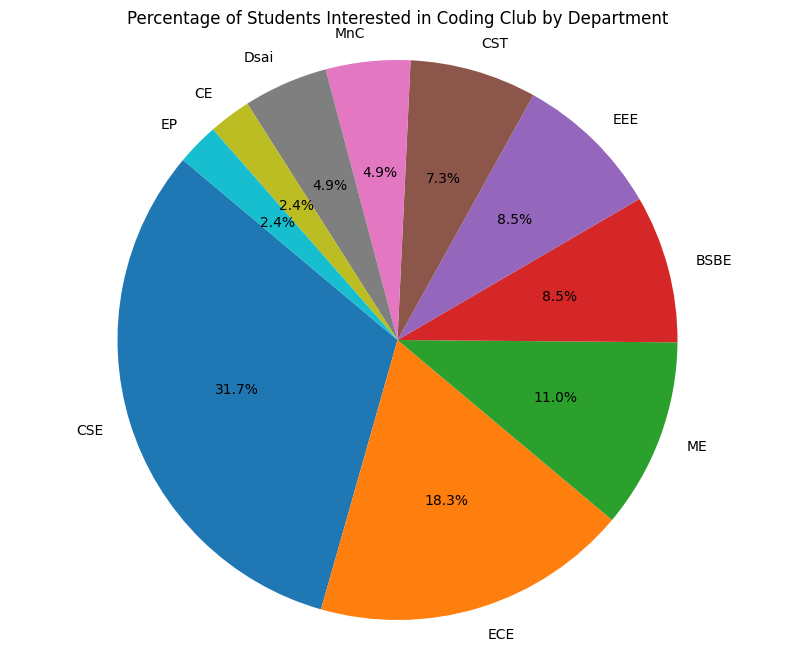

In [121]:
df['fav_club'].fillna('', inplace=True)
coding_club_df = df[df['fav_club'].str.contains('Coding Club', case=False, na=False)]
department_counts = coding_club_df['dep'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Students Interested in Coding Club by Department')
plt.axis('equal')

plt.show()

**FINDING THE FAV_SPOTS OF STUDENTS AVAILABLE IN CAMPUS.**

In [124]:
print(df['fav_spot'].unique())

['IITG_Lake' 'Food_Court' 'Hostel_Canteen' 'Khoka' 'serpentine' nan
 'New_Sac' 'Old_Sac' 'Playgrounds' 'Tihor_lake' 'Market_Complex' 'Others']


# BARPLOT REPRESENTING THE FAVORITE SPOT ON CAMPUS BY RELATIONSHIP STATUS


1.FOOD COURT AND OLD_SAC IS ONLY LIKED BY SINGLE PEOPLE.


2.TIHOR LAKE IS MOSTLY LIKED BY STUDENTS "*IN RELATIONSHIP*"


3.REST OTHER PLACES ARE FAV_SPOT OF SINGLES BECAUSE AS WE CAN SEE THEIR PERCENTAGE IS HIGH IN CAMPUS SO THEIR CHOICES IN GRAPH DOMINATE OVER OTHERS,


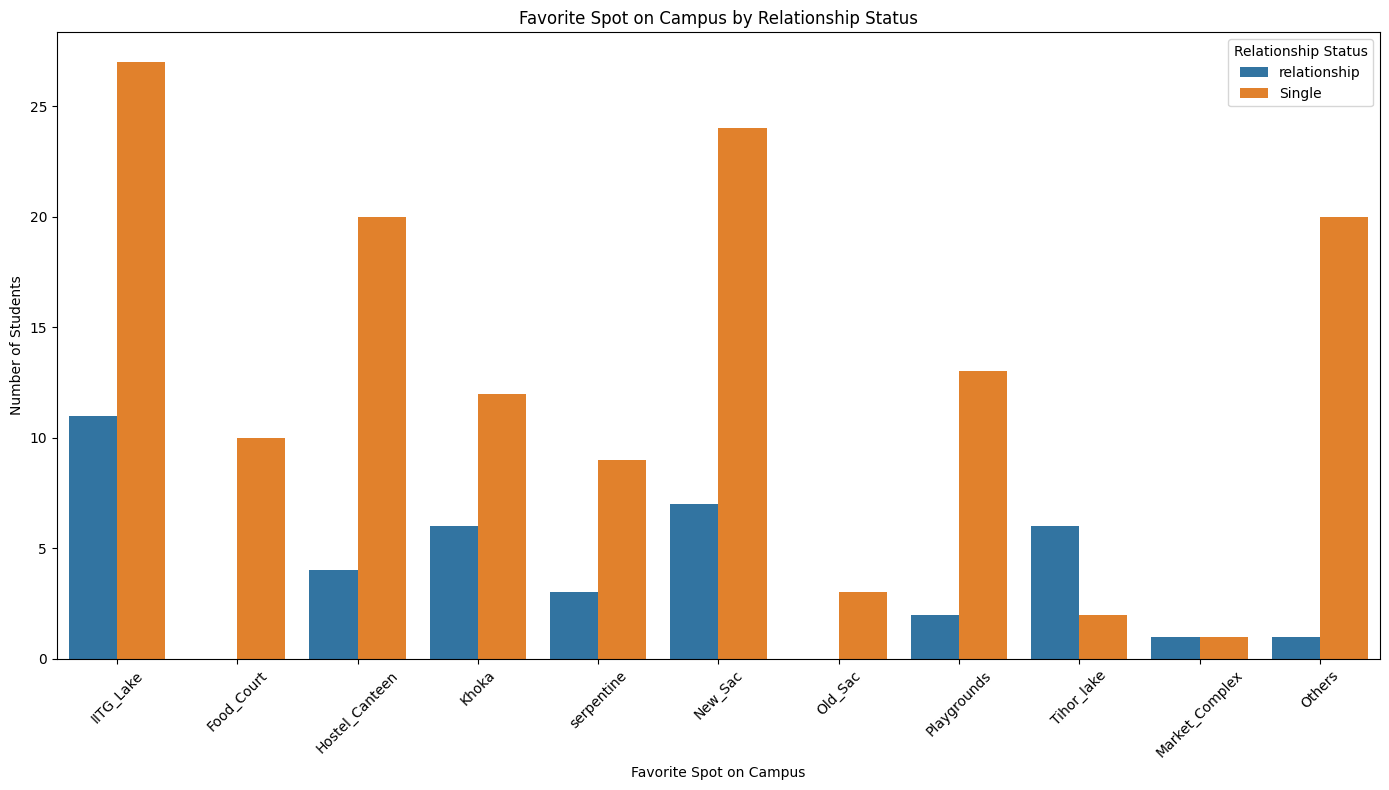

In [130]:
valid_rel_statuses = ['Single', 'relationship']
df_filtered = df[df['rel'].isin(valid_rel_statuses)]
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, x='fav_spot', hue='rel')
plt.title('Favorite Spot on Campus by Relationship Status')
plt.xlabel('Favorite Spot on Campus')
plt.ylabel('Number of Students')
plt.legend(title='Relationship Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# BARPLOT REPRESENTING THE NUMBER OF SINGLE STUDENTS BY DEPARTMENT.

1.MOST SINGLE STUDENTS ARE IN "BSBE, "CST", "CE" AND "MNC".


2."CL" ANS "EP" PEEPS ARE REALLY VERY ENGAGED.

/tmp/ipykernel_33/1241123840.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Single_Count'].fillna(0, inplace=True)


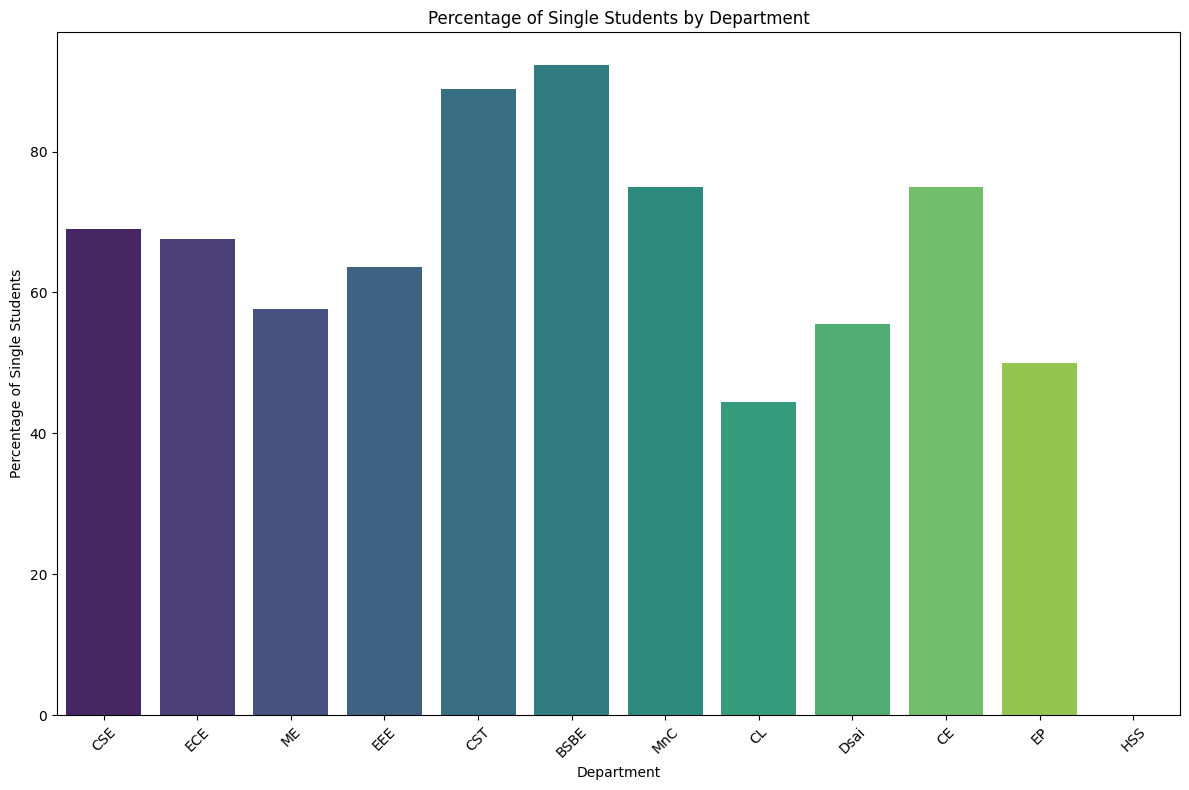

In [126]:
total_students_per_dep = df['dep'].value_counts().reset_index()
total_students_per_dep.columns = ['Department', 'Total']
single_students = df[df['rel'].str.lower() == 'single']
single_students_count = single_students['dep'].value_counts().reset_index()
single_students_count.columns = ['Department', 'Single_Count']
merged_df = pd.merge(total_students_per_dep, single_students_count, on='Department', how='left')
merged_df['Single_Count'].fillna(0, inplace=True)
merged_df['Single_Percentage'] = (merged_df['Single_Count'] / merged_df['Total']) * 100
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df, x='Department', y='Single_Percentage', palette='viridis')
plt.title('Percentage of Single Students by Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Single Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*STUDENTS WHOSE FAVORITE SPORT ACTIVITY IS "**SEX**" ALONG WITH THEIR DEPARTMENTS.*

In [127]:
fav_sport_sex_count = df[df['sport'].str.lower() == 'sex'].shape[0]
sex_dep=df['dep'].str.lower()=='sex'
fav_activity_sex = df[df['sport'].str.lower() == 'sex']

print(f'The number of students whose favorite sport is "sex": {fav_sport_sex_count}')

departments_of_students = fav_activity_sex['dep'].unique()
print('Departments of students whose favorite activity is "sex":')
for department in departments_of_students:
    print(department)

The number of students whose favorite sport is "sex": 2
Departments of students whose favorite activity is "sex":
EP
ME


# *SMALL RESEARCH ON MY DEPARTMENT I.E. MECHANICAL TO KNOW THAT CAN I HAVE 9+ CPI EVEN AFTER BEING IN RELATIONSHIP AND ALSO TO PREDICT THAT WHAT ARE THE CHANCES THAT I CAN BE IN RELATIONSHIP :) *

In [128]:
me_students = df[df['dep'].str.contains('ME', case=False, na=False)]
me_count = me_students.shape[0]
print(me_count)
total_me_students = me_students.shape[0]
me_single_students = me_students[me_students['rel'].str.contains('Single', case=False, na=False)]
single_me_students_count = me_single_students.shape[0]
if total_me_students > 0:
    single_me_students_percentage = (single_me_students_count / total_me_students) * 100
else:
    single_me_students_percentage = 0
print(f'The percentage of single students in the ME department is: {single_me_students_percentage:.2f}%')
me_students_nan_rel = me_students[me_students['rel'].isna()]
nan_rel_me_students_count = me_students_nan_rel.shape[0]
print(nan_rel_me_students_count)

26
The percentage of single students in the ME department is: 57.69%
1


"ME" STUDENTS WHO ARE IN RELATIONSHIP AND HAVE CPI OVER 9.

In [129]:
me_students = df[df['dep'].str.contains('ME', case=False, na=False)]

me_rel_high_cpi_students = me_students[(me_students['rel'].str.contains('Relationship', case=False, na=False)) & (me_students['cpi'] > 9)]

me_rel_high_cpi_count = me_rel_high_cpi_students.shape[0]
print(me_rel_high_cpi_count)

0
